In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math score'],axis=1)

In [5]:
y=df['math score']

In [6]:
## Create column transformer 
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)


In [7]:
X=preprocessor.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [11]:
def eval_model(true,predicted ):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2


In [15]:
models= {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_rmse,model_train_r2=eval_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=eval_model(y_test,y_test_pred)

    print(list(models.values())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-------------------------------------')

    print('Model Performance for Test Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')    



LinearRegression()
Model Performance for Training Set
- Root Mean Squared Error: 5.3293
- Mean Absolute Error: 4.2715
- R2 Score: 0.8740
-------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.4252
- Mean Absolute Error: 4.2222
- R2 Score: 0.8790


Lasso()
Model Performance for Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
-------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge()
Model Performance for Training Set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
-------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


KNeighborsRegressor()
Model Performance for Training Set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
---------

In [16]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
7,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.850471
8,AdaBoost Regressor,0.846663
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.739560


In [18]:
##Select Linear Regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)



Accuracy of the model is 87.90


Text(0, 0.5, 'Predicted')

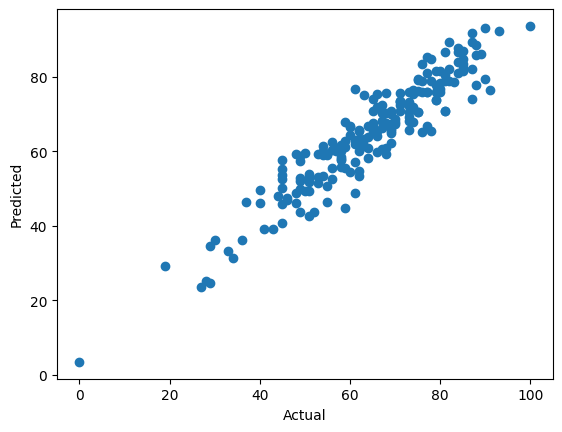

In [19]:
##Plot
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

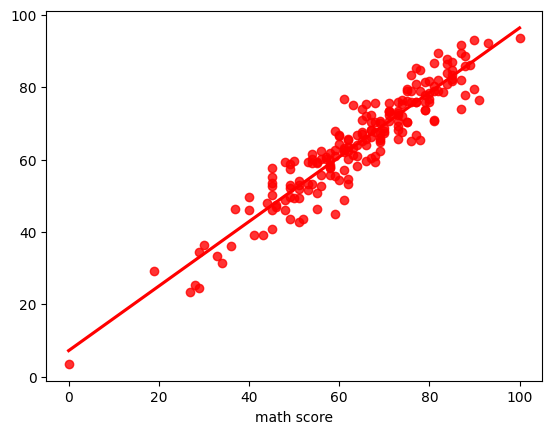

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [22]:
##Difference between actual and predicted
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
